<h1><center>👩‍💉 Vaccine impact on COVID-19 indicators ⚕️</center></h1>
<h3><center> 📈(Prediction at the end)🔮</center></h3>
<center><img src= "https://cdn.futura-sciences.com/buildsv6/images/wide1920/e/1/d/e1dac2e6d3_50178443_vaccincovid.jpg" alt ="Vaccine" style='width: 600px;'></center>

<h3>Context</h3>
<p>
Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019. The disease has since spread worldwide, leading to an ongoing pandemic.

Symptoms of COVID-19 are variable, but often include fever, cough, headache, fatigue, breathing difficulties, and loss of smell and taste. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction). Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.

COVID-19 transmits when people breathe in air contaminated by droplets and small airborne particles. The risk of breathing these in is highest when people are in close proximity, but they can be inhaled over longer distances, particularly indoors. Transmission can also occur if splashed or sprayed with contaminated fluids, in the eyes, nose or mouth, and, rarely, via contaminated surfaces. People remain contagious for up to 20 days, and can spread the virus even if they do not develop any symptoms.
    
World Health Organization article : https://www.who.int/health-topics/coronavirus
</p>

# Exploratory Data Analysis

## Aim :
* Understand the data ("A small step forward is better than a big one backwards")
* Begin to develop a modelling strategy

## Features

- extract_date : row date formatted dd/mm/yyyy

- tx_incid : The incidence rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days compared to the size of the population. It is expressed per 100,000 inhabitants and makes it possible to compare geographic areas with one another.

- R : The virus reproduction number: this is the average number of people an infected person can infect. If the effective R is greater than 1, the epidemic develops; if it is less than 1, the epidemic recedes. This indicator, stopped on Tuesday and updated on Thursday, is an indicator of the epidemiological situation approximately 7 days previously and must be interpreted in the light of screening and data reporting activities. The indicator is updated once a week.

- taux_occupation_sae (%) : This indicator reflects the level of demand for resuscitation but also the level of stress on hospital resuscitation capacities. This is the proportion of patients with COVID-19 currently in intensive care, intensive care, or in a continuous monitoring unit compared to the total beds in initial capacity, that is to say before increasing the capacity. resuscitation beds in a hospital.

- tx_pos : The positivity rate corresponds to the number of people tested positive (RT-PCR and antigen test) for the first time in more than 60 days compared to the total number of people tested positive or negative over a given period; and who have never tested positive in the previous 60 days.

- n_dose1 : Number of 1rst dose of vaccine administered this day

- n_complet : Number of complete coverage granted this day (1 dose for J&J - 2 doses for Pfitzer/AstraZenecca/Moderna - 1 dose if you ever had COVID-19 before)

- n_cum_dose1 : Cumulated number of 1rst doses administered

- n_cum_complet : Cumulated number of complete coverages

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../input/vaccination-impact-on-covid19-indicators/Vaccine consequences on reproductibility.csv")
data = data.set_index(pd.to_datetime(data["extract_date"], dayfirst=True))
data = data.drop("extract_date",axis=1)
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

,tx_incid,R,taux_occupation_sae,tx_pos,n_dose1,n_complet,n_cum_dose1,n_cum_complet
extract_date,,,,,,,,
2020-12-27,123.044038,0.96,52.4,2.809808,236,4,236,4
2020-12-28,124.204732,0.95,53.3,3.156600,248,1,484,5
2020-12-29,126.003138,0.95,52.7,3.738989,189,0,673,5
2020-12-30,129.529921,0.95,52.4,4.497706,217,1,890,6
2020-12-31,133.357680,0.97,51.9,5.055753,176,0,1066,6


  0%|          | 0/129 [00:00<?, ?it/s]


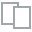
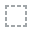
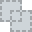
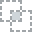
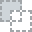
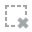
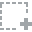
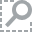
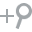
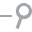
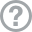
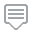
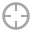
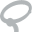
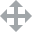
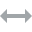
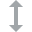
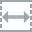
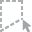
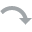
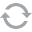
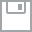
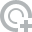
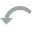
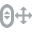
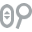
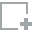
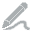
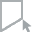
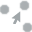
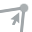
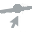

In [4]:
plot_missing(df)

# A bit of data engineering

#### (Let's talk in percentage)

In [6]:
nb_french_inhab = 64810000
df["n_cum_dose1_per"] = df["n_cum_dose1"]*100/60060000
df["n_cum_complet_per"] = df["n_cum_complet"]*100/60060000
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1])
df.head()

,tx_incid,R,taux_occupation_sae,tx_pos,n_dose1,n_complet,n_cum_dose1,n_cum_complet,n_cum_dose1_per,n_cum_complet_per
extract_date,,,,,,,,,,
2020-12-27,123.044038,0.96,52.4,2.809808,236,4,236,4,0.000393,0.000007
2020-12-28,124.204732,0.95,53.3,3.156600,248,1,484,5,0.000806,0.000008
2020-12-29,126.003138,0.95,52.7,3.738989,189,0,673,5,0.001121,0.000008
2020-12-30,129.529921,0.95,52.4,4.497706,217,1,890,6,0.001482,0.000010
2020-12-31,133.357680,0.97,51.9,5.055753,176,0,1066,6,0.001775,0.000010


#### Let's add timestamps to the dataset

In [7]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday

code = {0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thursday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday',
         }
df.loc[:,"Weekday Name"]=df['Weekday Name'].map(code)

code = {1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
         }
df.loc[:,"Month"]=df['Month'].map(code)

df.head()

,tx_incid,R,taux_occupation_sae,tx_pos,n_dose1,...,n_cum_dose1_per,n_cum_complet_per,Year,Month,Weekday Name
extract_date,,,,,,,,,,,
2020-12-27,123.044038,0.96,52.4,2.809808,236,...,0.000393,0.000007,2020,Dec,Sunday
2020-12-28,124.204732,0.95,53.3,3.156600,248,...,0.000806,0.000008,2020,Dec,Monday
2020-12-29,126.003138,0.95,52.7,3.738989,189,...,0.001121,0.000008,2020,Dec,Tuesday
2020-12-30,129.529921,0.95,52.4,4.497706,217,...,0.001482,0.000010,2020,Dec,Wednesday
2020-12-31,133.357680,0.97,51.9,5.055753,176,...,0.001775,0.000010,2020,Dec,Thursday


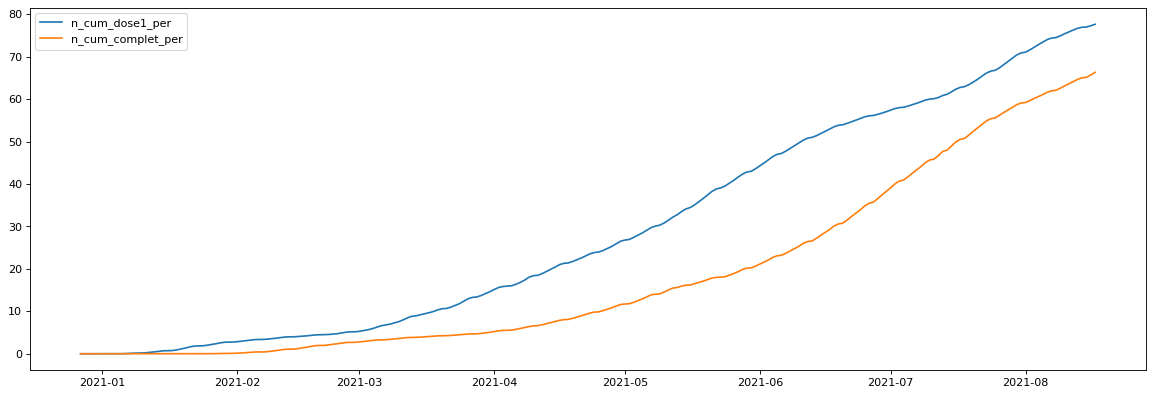

In [8]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(df["n_cum_dose1_per"],label="n_cum_dose1_per")
plt.plot(df["n_cum_complet_per"],label="n_cum_complet_per")
plt.legend()
plt.show()

<Figure size 288x288 with 0 Axes>

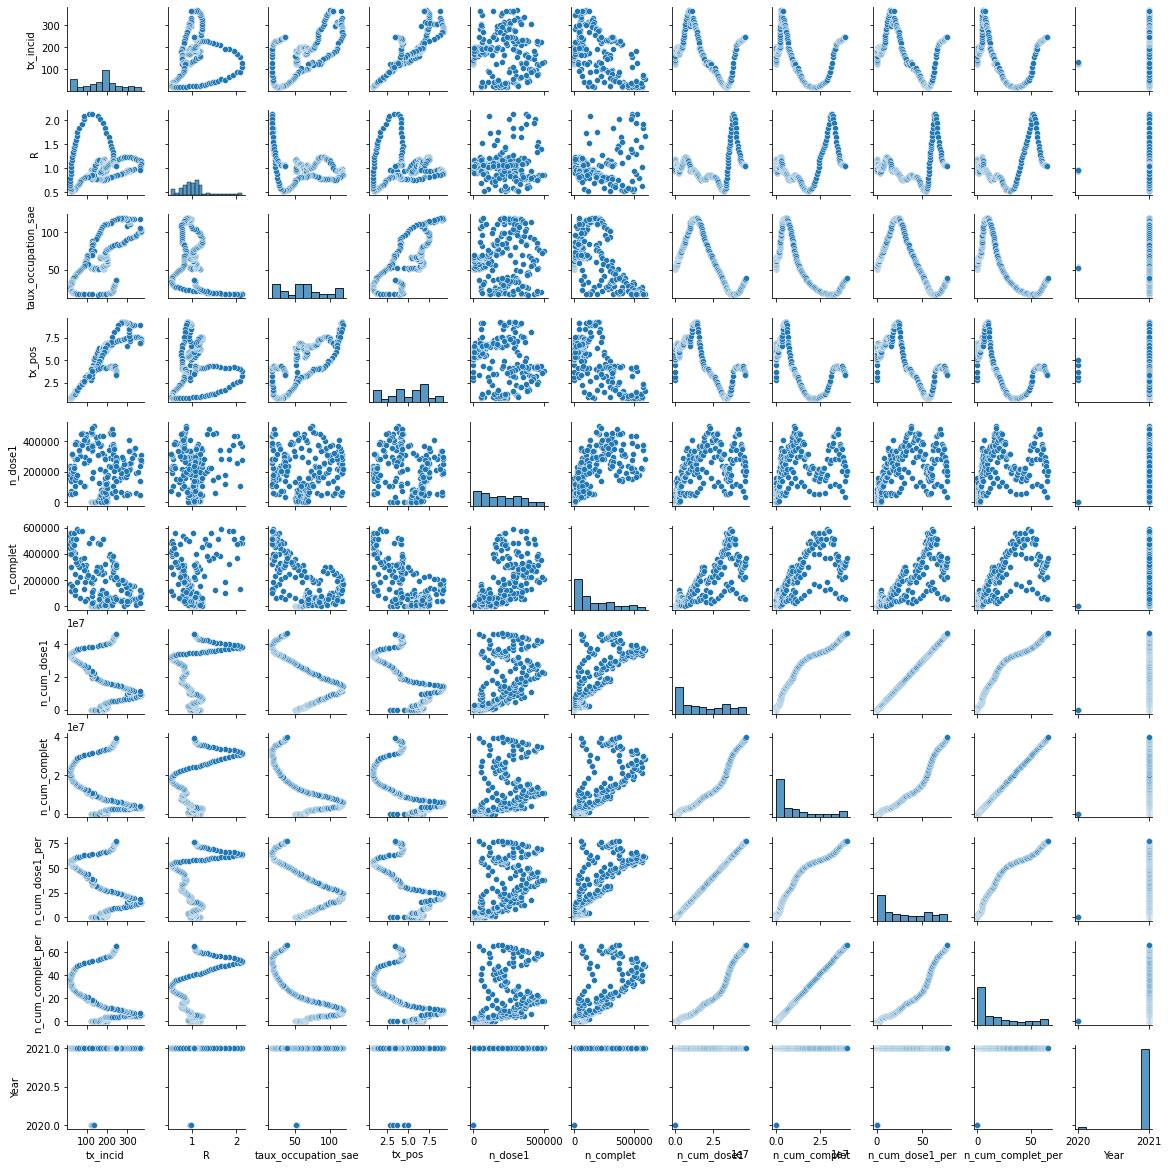

In [9]:
plt.figure(figsize=(4,4))
sns.pairplot(df,height=1.5)
plt.show()

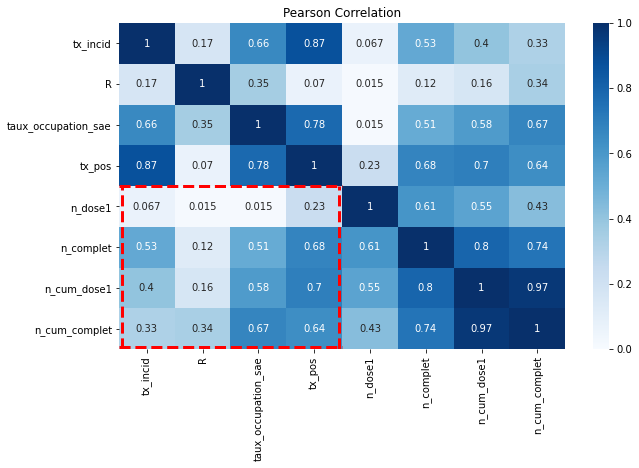

In [10]:
measurement = ['tx_incid','R','taux_occupation_sae','tx_pos','n_dose1','n_complet','n_cum_dose1','n_cum_complet']
corr = df[measurement].corr(method='pearson').abs()

fig = plt.figure(figsize=(10,6))
ax = sns.heatmap(corr, annot=True, cmap='Blues', vmin=0, vmax=+1)

ax.axhline(4,0,4/8, ls='--', linewidth=3, color="red")
ax.axvline(4-0.05,0,4/8, ls='--', linewidth=3, color="red")
ax.axhline(8-0.05,0,4/8, ls='--', linewidth=3, color="red")
ax.axvline(0.05,0,4/8, ls='--', linewidth=3, color="red")
# As we know all COVID indicators are correlated together, so are the vaccine data, we will only look to the crosstab correlations for couples VaccineData/CovidIndicator (Red Square)

plt.title('Pearson Correlation')
plt.show()

## Comments

#### We can see in the red square that 2 COVID indicators are well correlated with vaccine data : **tx_pos** and **taux_occupation_sae**

Let's check :

In [11]:
print (df[measurement].corr()['taux_occupation_sae'].abs().sort_values())

n_dose1                0.015258
R                      0.353370
n_complet              0.513457
n_cum_dose1            0.582634
tx_incid               0.657807
n_cum_complet          0.672009
tx_pos                 0.778796
taux_occupation_sae    1.000000
Name: taux_occupation_sae, dtype: float64


# Variations

In [12]:
features = ['n_dose1','n_complet','R']

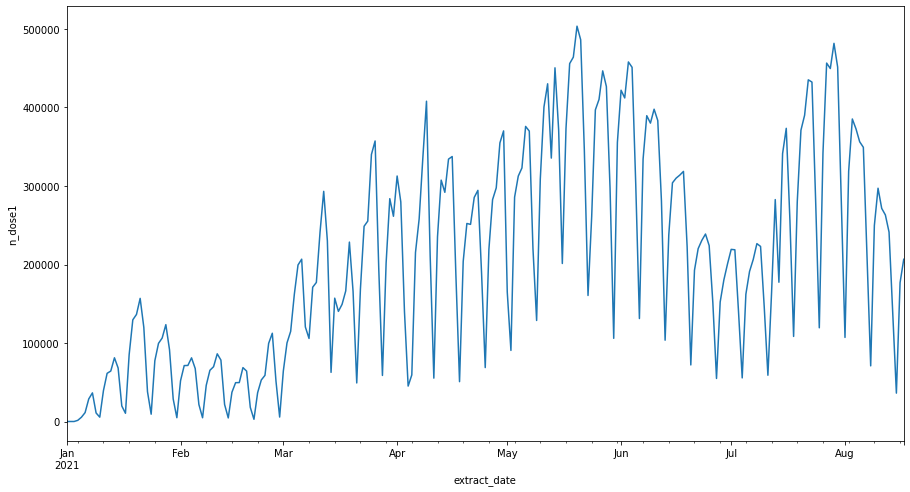

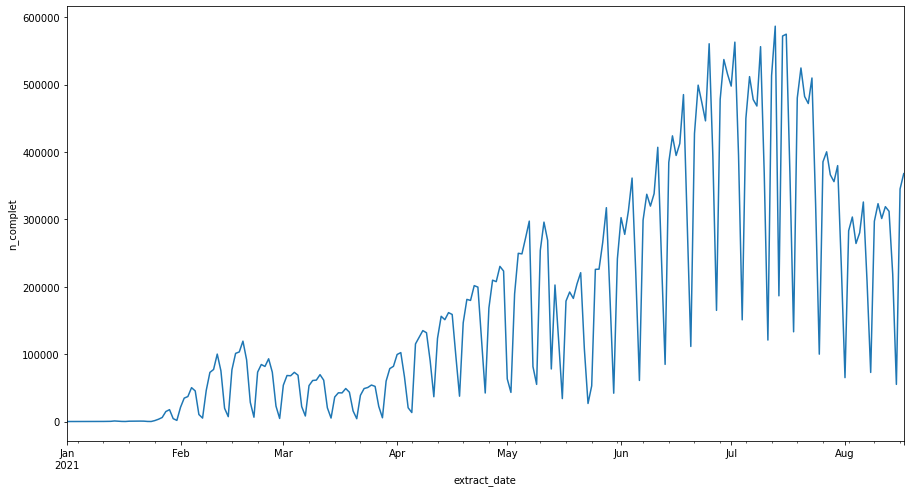

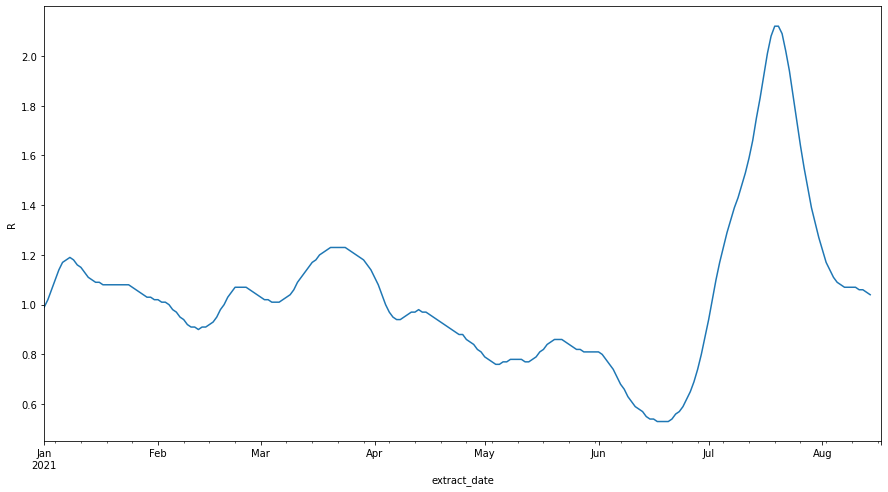

In [13]:
for f in features :
    plt.figure(figsize=(15,8))
    ax = df[f].loc['2021'].plot()
    ax.set_ylabel(f);
    plt.show()

## Comments
#### It looks like vaccination tends to be periodic : there are some time when people tend to vaccinate more than others.
#### Let's check the frequency

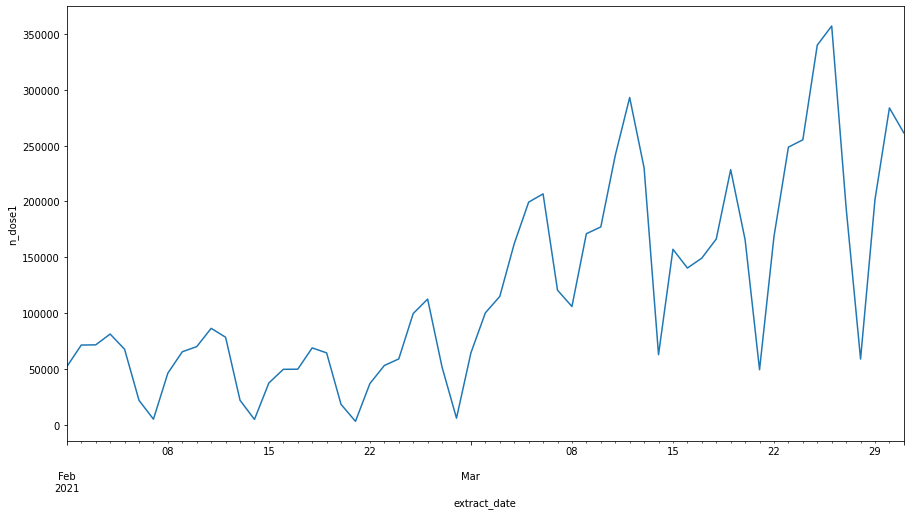

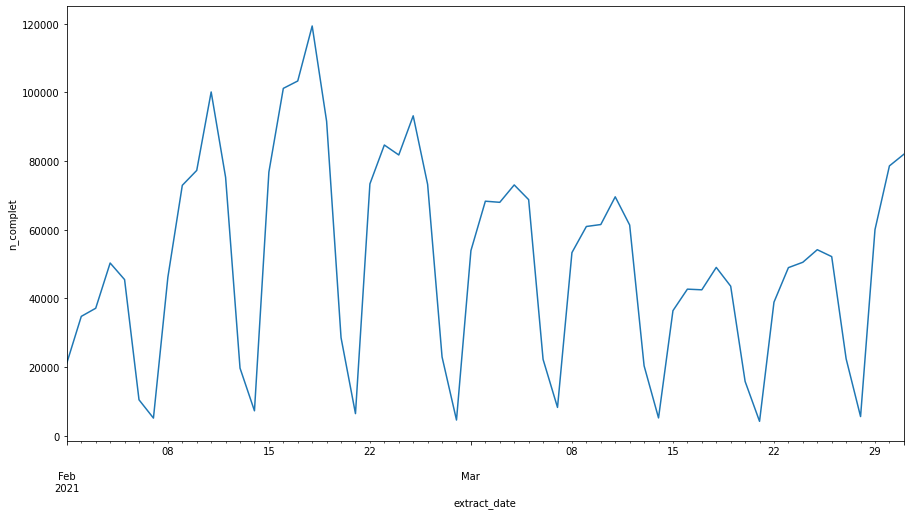

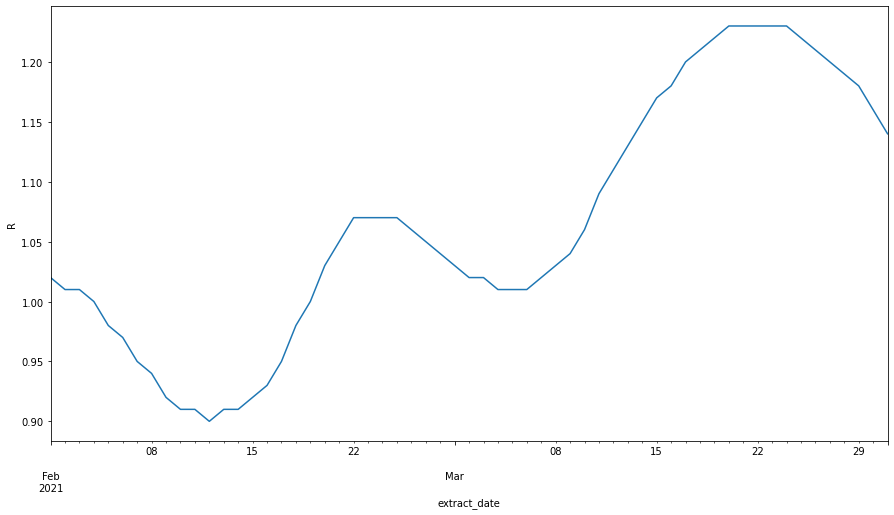

In [14]:
for f in features :
    plt.figure(figsize=(15,8))
    ax = df[f].loc['2021-02':'2021-03'].plot()
    ax.set_ylabel(f);
    plt.show()

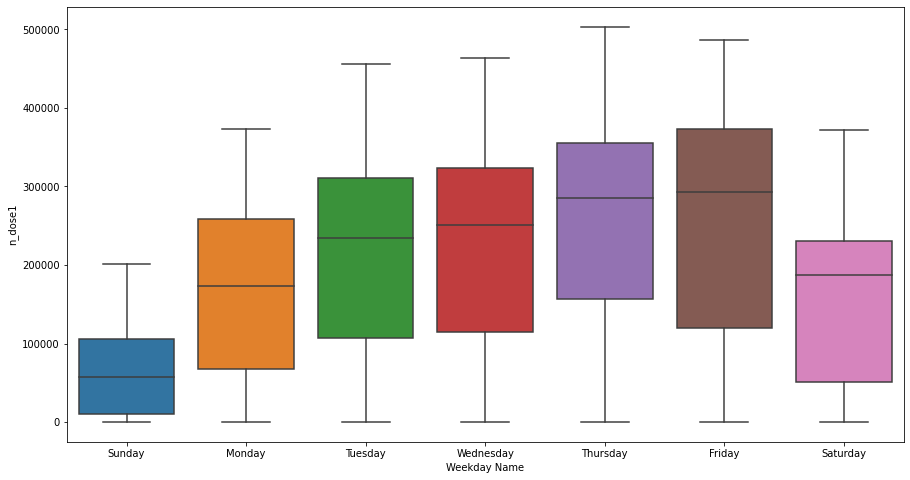

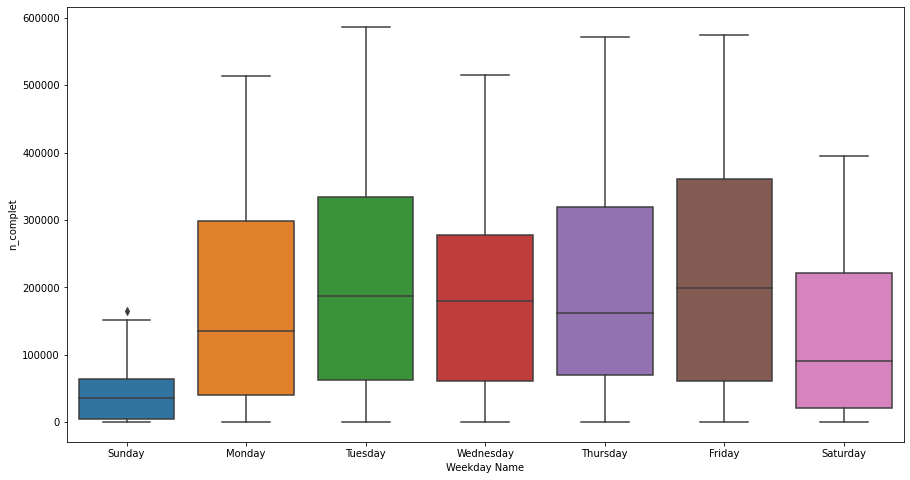

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Weekday Name', y='n_dose1');
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Weekday Name', y='n_complet');

## Comments
#### It looks like there are less people that are getting vaccinated during the week-end

<Figure size 432x288 with 0 Axes>

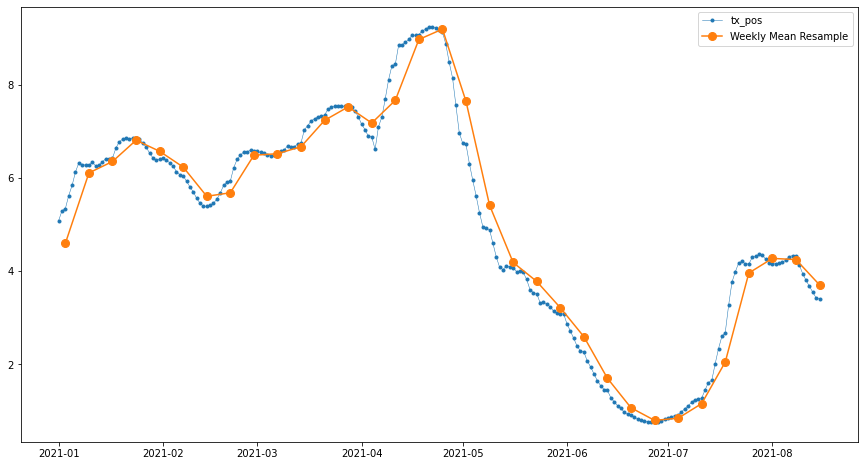

<Figure size 432x288 with 0 Axes>

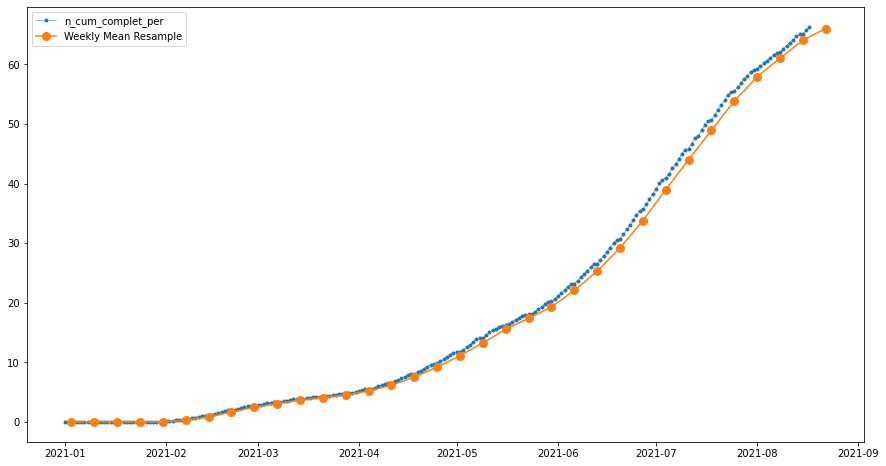

<Figure size 432x288 with 0 Axes>

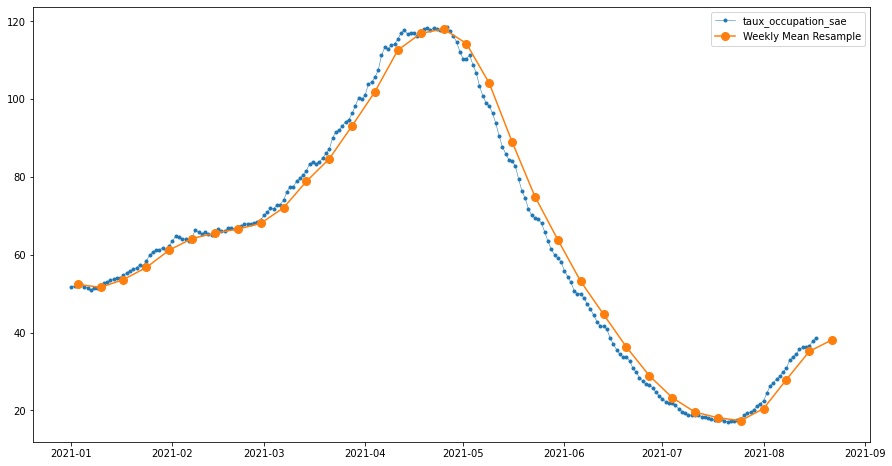

In [16]:
start, end = '2021-01', '2021-08'
features = ['tx_pos','n_cum_complet_per','taux_occupation_sae']
# Plot daily and weekly resampled time series together

for f in features :
    plt.figure()
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(df.loc[start:end, f],
    marker='.', linestyle='-', linewidth=0.5, label=f)
    df_weekly_mean = df.resample('W').mean()
    ax.plot(df_weekly_mean.loc[start:end, f],
    marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
    ax.legend();
    plt.show()

# Conclusion
### We can see that summer in France had a hugeimpact on COVID-19 contaminations. But still, we can tell that vaccine globally have a huge impact on decreasing the COVID-19 indicators
## Get vaccinated ! 
### The more people are vaccinated, the less resuscitation units will be saturated